![alt text](<Perhitungan Manual/Slide1.PNG>)

![alt text](<Perhitungan Manual/Slide2.PNG>)

![alt text](<Perhitungan Manual/Slide3.PNG>)

![alt text](<Perhitungan Manual/Slide4.PNG>)

![alt text](<Perhitungan Manual/Slide5.PNG>)

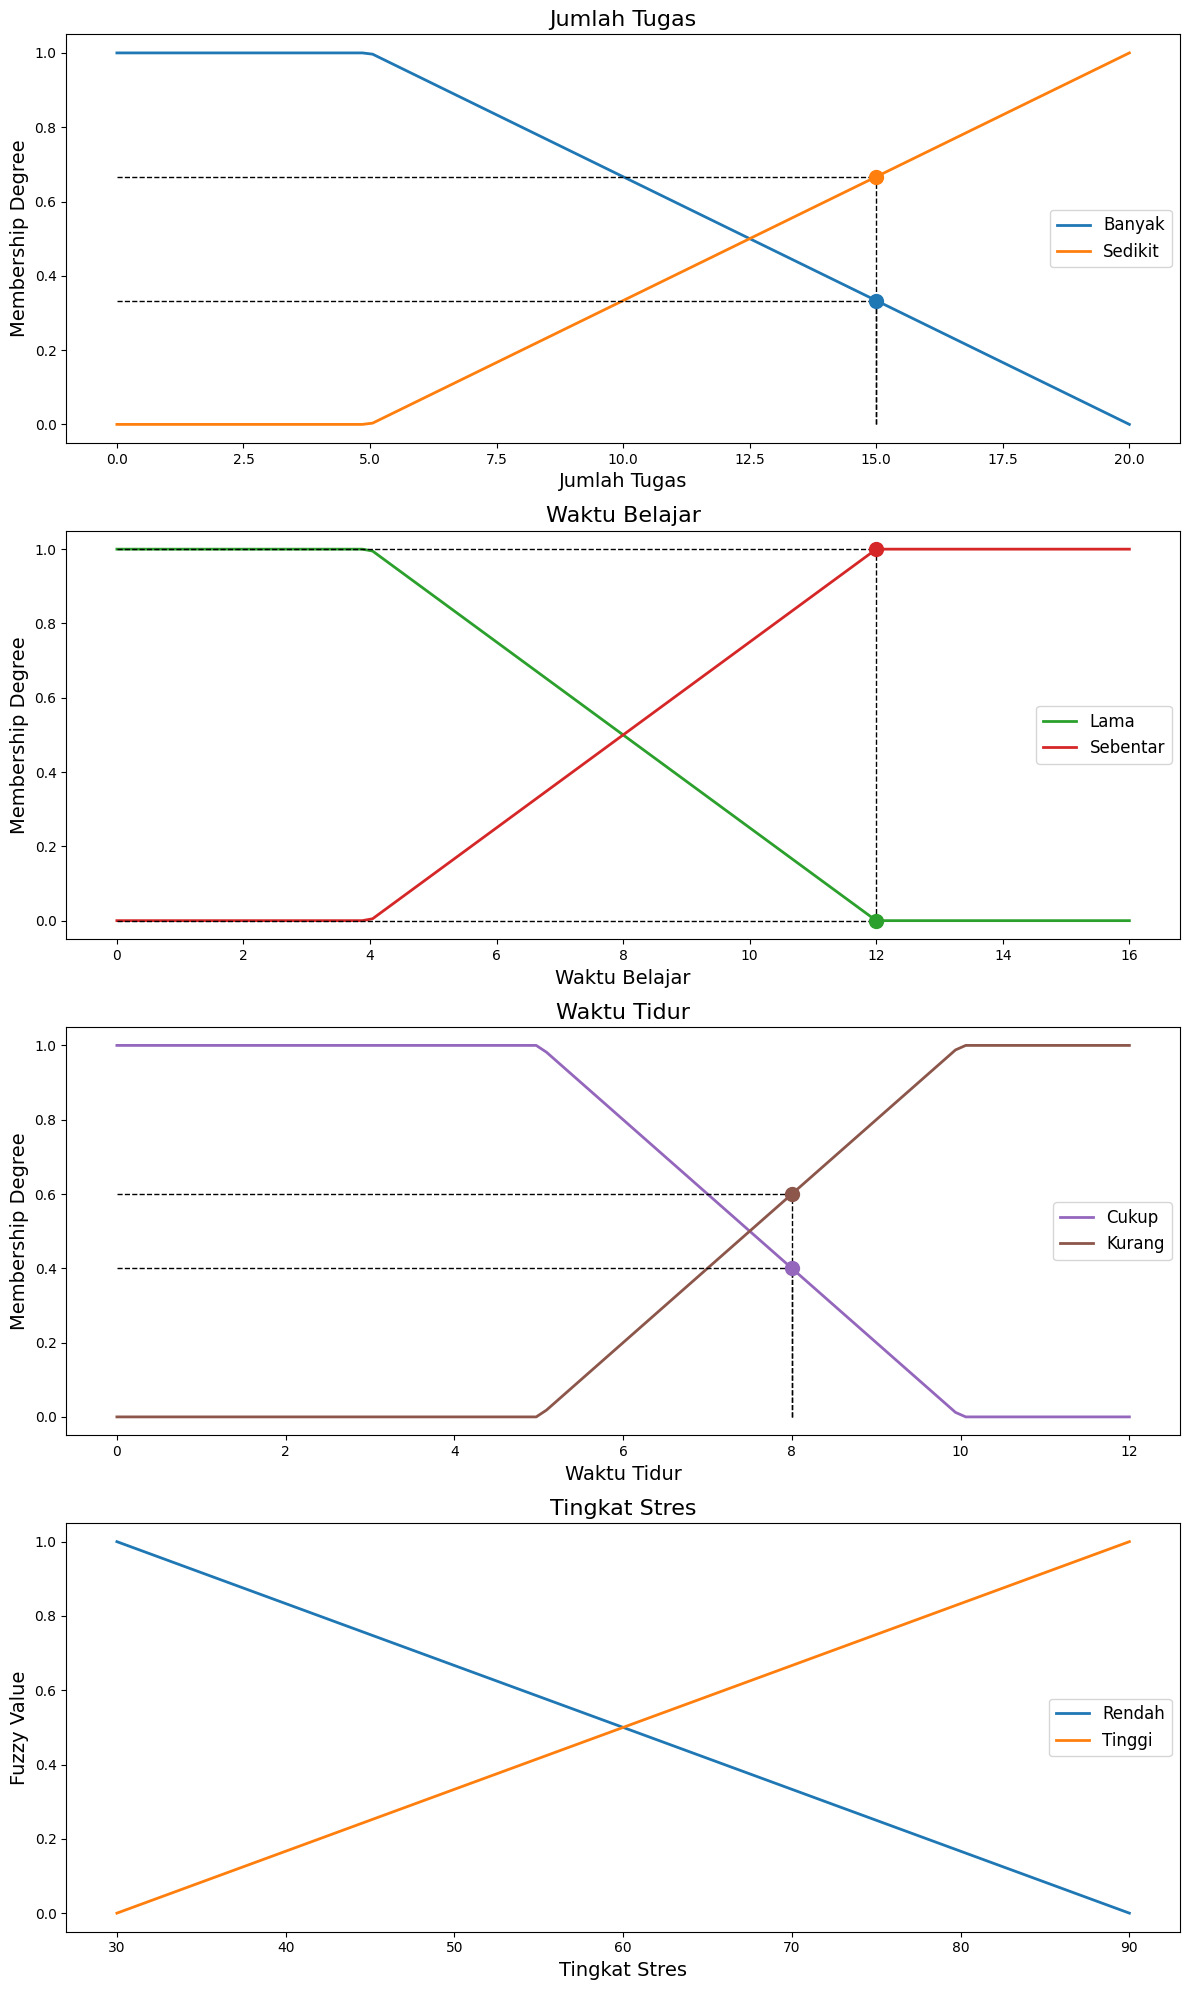

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class Fuzzy:
    def __init__(self, min_val, max_val):
        self.min = min_val
        self.max = max_val

    def down(self, x):
        return (self.max - x) / (self.max - self.min)

    def up(self, x):
        return (x - self.min) / (self.max - self.min)

    def rev_down(self, fuzzy_value):
        return self.max - fuzzy_value * (self.max - self.min)

    def rev_up(self, fuzzy_value):
        return fuzzy_value * (self.max - self.min) + self.min

# Kelas turunan untuk Tugas, Belajar, Tidur
class JumlahTugas(Fuzzy):
    def __init__(self):
        super().__init__(5, 20)

    def banyak(self, x):
        if x <= self.min:
            return 1
        if x >= self.max:
            return 0
        return self.down(x)

    def sedikit(self, x):
        if x <= self.min:
            return 0
        if x >= self.max:
            return 1
        return self.up(x)

class WaktuBelajar(Fuzzy):
    def __init__(self):
        super().__init__(4, 12)

    def lama(self, x):
        if x <= self.min:
            return 1
        if x >= self.max:
            return 0
        return self.down(x)

    def sebentar(self, x):
        if x <= self.min:
            return 0
        if x >= self.max:
            return 1
        return self.up(x)

class WaktuTidur(Fuzzy):
    def __init__(self):
        super().__init__(5, 10)

    def cukup(self, x):
        if x <= self.min:
            return 1
        if x >= self.max:
            return 0
        return self.down(x)

    def kurang(self, x):
        if x <= self.min:
            return 0
        if x >= self.max:
            return 1
        return self.up(x)

# Kelas Stres
class Stres:
    def __init__(self):
        self.min = 30
        self.max = 90

    def rendah(self, fuzzy_value):
        return self.max - fuzzy_value * (self.max - self.min)

    def tinggi(self, fuzzy_value):
        return fuzzy_value * (self.max - self.min) + self.min

# Variabel Input Tugas, Belajar, Tidur
tugas = JumlahTugas()
belajar = WaktuBelajar()
tidur = WaktuTidur()
stres = Stres()

# Range untuk x (jumlah tugas, waktu belajar, waktu tidur)
data_tugas = np.linspace(0, 20, 100)
data_belajar = np.linspace(0, 16, 100)
data_tidur = np.linspace(0, 12, 100)

# Data fuzzy value untuk Stres
fuzzy_values = np.linspace(0, 1, 100)
rendah_values = [stres.rendah(fv) for fv in fuzzy_values]
tinggi_values = [stres.tinggi(fv) for fv in fuzzy_values]

# Plotting
fig, axs = plt.subplots(4, 1, figsize=(12, 20))

# Plot untuk Tugas
axs[0].plot(data_tugas, [tugas.banyak(x) for x in data_tugas], label='Banyak', color='#1f77b4', linewidth=2)
axs[0].plot(data_tugas, [tugas.sedikit(x) for x in data_tugas], label='Sedikit', color='#ff7f0e', linewidth=2)
x_tugas = 15
axs[0].plot([0, x_tugas], [tugas.banyak(x_tugas), tugas.banyak(x_tugas)], 'k--', linewidth=1)
axs[0].plot([0, x_tugas], [tugas.sedikit(x_tugas), tugas.sedikit(x_tugas)], 'k--', linewidth=1)
axs[0].plot([x_tugas, x_tugas], [0, tugas.banyak(x_tugas)], 'k--', linewidth=1)
axs[0].plot([x_tugas, x_tugas], [0, tugas.sedikit(x_tugas)], 'k--', linewidth=1)
axs[0].scatter(x_tugas, tugas.banyak(x_tugas), color='#1f77b4', zorder=5, s=100)
axs[0].scatter(x_tugas, tugas.sedikit(x_tugas), color='#ff7f0e', zorder=5, s=100)
axs[0].set_title('Jumlah Tugas', fontsize=16)
axs[0].set_xlabel('Jumlah Tugas', fontsize=14)
axs[0].set_ylabel('Membership Degree', fontsize=14)
axs[0].legend(fontsize=12)

# Plot untuk Belajar
axs[1].plot(data_belajar, [belajar.lama(x) for x in data_belajar], label='Lama', color='#2ca02c', linewidth=2)
axs[1].plot(data_belajar, [belajar.sebentar(x) for x in data_belajar], label='Sebentar', color='#d62728', linewidth=2)
x_belajar = 12
axs[1].plot([0, x_belajar], [belajar.lama(x_belajar), belajar.lama(x_belajar)], 'k--', linewidth=1)
axs[1].plot([0, x_belajar], [belajar.sebentar(x_belajar), belajar.sebentar(x_belajar)], 'k--', linewidth=1)
axs[1].plot([x_belajar, x_belajar], [0, belajar.lama(x_belajar)], 'k--', linewidth=1)
axs[1].plot([x_belajar, x_belajar], [0, belajar.sebentar(x_belajar)], 'k--', linewidth=1)
axs[1].scatter(x_belajar, belajar.lama(x_belajar), color='#2ca02c', zorder=5, s=100)
axs[1].scatter(x_belajar, belajar.sebentar(x_belajar), color='#d62728', zorder=5, s=100)
axs[1].set_title('Waktu Belajar', fontsize=16)
axs[1].set_xlabel('Waktu Belajar', fontsize=14)
axs[1].set_ylabel('Membership Degree', fontsize=14)
axs[1].legend(fontsize=12)

# Plot untuk Tidur
axs[2].plot(data_tidur, [tidur.cukup(x) for x in data_tidur], label='Cukup', color='#9467bd', linewidth=2)
axs[2].plot(data_tidur, [tidur.kurang(x) for x in data_tidur], label='Kurang', color='#8c564b', linewidth=2)
x_tidur = 8
axs[2].plot([0, x_tidur], [tidur.cukup(x_tidur), tidur.cukup(x_tidur)], 'k--', linewidth=1)
axs[2].plot([0, x_tidur], [tidur.kurang(x_tidur), tidur.kurang(x_tidur)], 'k--', linewidth=1)
axs[2].plot([x_tidur, x_tidur], [0, tidur.cukup(x_tidur)], 'k--', linewidth=1)
axs[2].plot([x_tidur, x_tidur], [0, tidur.kurang(x_tidur)], 'k--', linewidth=1)
axs[2].scatter(x_tidur, tidur.cukup(x_tidur), color='#9467bd', zorder=5, s=100)
axs[2].scatter(x_tidur, tidur.kurang(x_tidur), color='#8c564b', zorder=5, s=100)
axs[2].set_title('Waktu Tidur', fontsize=16)
axs[2].set_xlabel('Waktu Tidur', fontsize=14)
axs[2].set_ylabel('Membership Degree', fontsize=14)
axs[2].legend(fontsize=12)

# Plot untuk Stres
axs[3].plot(rendah_values, fuzzy_values, label='Rendah', color='#1f77b4', linewidth=2)
axs[3].plot(tinggi_values, fuzzy_values, label='Tinggi', color='#ff7f0e', linewidth=2)
axs[3].set_title('Tingkat Stres', fontsize=16)
axs[3].set_xlabel('Tingkat Stres', fontsize=14)
axs[3].set_ylabel('Fuzzy Value', fontsize=14)
axs[3].legend(fontsize=12)

plt.tight_layout()
plt.show()
